# Wrangle

Comprised of 2 parts: Acquisition and Preparation.

In Acquisition, the goal is to create functions that download the RT-IoT2022 dataset. In Preparation, I will conduct light analysis on the data in order to develop questions to be answered during a later stage.

## Acquisition
---

### Imports
I will be starting off with the basic imports of Pandas and NumPy

In [1]:
# Standard imports
import pandas as pd
import numpy as np

Additionally, I will define a random state of 42 for any time I need to work with a random state parameter.

In [3]:
# Define ranstate for random state
ranstate = 42

### Download

The first thing I need to do is to download the data. The data comes from the [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/dataset/942/rt-iot2022), and I need to develop or find a way to download it.

Looking on the page, it appears there is already documentation regarding importing using Python, so I will be using that.

In [5]:
# Install the necessary UC Irvine package
!pip install ucimlrepo

In [7]:
# Use the code provided to import the data:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
rt_iot2022 = fetch_ucirepo(id=942) 
  
# data (as pandas dataframes) 
X = rt_iot2022.data.features 
y = rt_iot2022.data.targets 
  
# metadata 
print(rt_iot2022.metadata) 
  
# variable information 
print(rt_iot2022.variables) 

{'uci_id': 942, 'name': 'RT-IoT2022 ', 'repository_url': 'https://archive.ics.uci.edu/dataset/942/rt-iot2022', 'data_url': 'https://archive.ics.uci.edu/static/public/942/data.csv', 'abstract': 'The RT-IoT2022, a proprietary dataset derived from a real-time IoT infrastructure, is introduced as a comprehensive resource integrating a diverse range of IoT devices and sophisticated network attack methodologies. This dataset encompasses both normal and adversarial network behaviours, providing a general representation of real-world scenarios.\nIncorporating data from IoT devices such as ThingSpeak-LED, Wipro-Bulb, and MQTT-Temp, as well as simulated attack scenarios involving Brute-Force SSH attacks, DDoS attacks using Hping and Slowloris, and Nmap patterns, RT-IoT2022 offers a detailed perspective on the complex nature of network traffic. The bidirectional attributes of network traffic are meticulously captured using the Zeek network monitoring tool and the Flowmeter plugin. Researchers can

### Examine the results
From these results, apparently a module or class object is created which holds all the data, plus some metadata concerning the dataset.

I need to examine this in depth and determine what my next steps will be.

In [9]:
rt_iot2022.data.features.columns

Index(['id.orig_p', 'id.resp_p', 'proto', 'service', 'flow_duration',
       'fwd_pkts_tot', 'bwd_pkts_tot', 'fwd_data_pkts_tot',
       'bwd_data_pkts_tot', 'fwd_pkts_per_sec', 'bwd_pkts_per_sec',
       'flow_pkts_per_sec', 'down_up_ratio', 'fwd_header_size_tot',
       'fwd_header_size_min', 'fwd_header_size_max', 'bwd_header_size_tot',
       'bwd_header_size_min', 'bwd_header_size_max', 'flow_FIN_flag_count',
       'flow_SYN_flag_count', 'flow_RST_flag_count', 'fwd_PSH_flag_count',
       'bwd_PSH_flag_count', 'flow_ACK_flag_count', 'fwd_URG_flag_count',
       'bwd_URG_flag_count', 'flow_CWR_flag_count', 'flow_ECE_flag_count',
       'fwd_pkts_payload.min', 'fwd_pkts_payload.max', 'fwd_pkts_payload.tot',
       'fwd_pkts_payload.avg', 'fwd_pkts_payload.std', 'bwd_pkts_payload.min',
       'bwd_pkts_payload.max', 'bwd_pkts_payload.tot', 'bwd_pkts_payload.avg',
       'bwd_pkts_payload.std', 'flow_pkts_payload.min',
       'flow_pkts_payload.max', 'flow_pkts_payload.tot',
       '

In [11]:
rt_iot2022.data.targets.value_counts()

Attack_type               
DOS_SYN_Hping                 94659
Thing_Speak                    8108
ARP_poisioning                 7750
MQTT_Publish                   4146
NMAP_UDP_SCAN                  2590
NMAP_XMAS_TREE_SCAN            2010
NMAP_OS_DETECTION              2000
NMAP_TCP_scan                  1002
DDOS_Slowloris                  534
Wipro_bulb                      253
Metasploit_Brute_Force_SSH       37
NMAP_FIN_SCAN                    28
Name: count, dtype: int64

In [13]:
# Check that the target column doesn't exist in features provided
rt_iot2022.data.features.columns.isin(["Attack_type"]).sum()

0

In [15]:
# Concatenate the two datasets
df = pd.concat([rt_iot2022.data.features,rt_iot2022.data.targets],axis=1)
df.sample(10,random_state=ranstate)

,id.orig_p,id.resp_p,proto,service,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,...,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,Attack_type
76235,7315,21,tcp,-,0.000001,1,1,1,0,838860.800000,...,0.0,0.00,0.00,0.00,0.00,0.0,64,0,64,DOS_SYN_Hping
36557,18609,21,tcp,-,0.000004,1,1,1,0,262144.000000,...,0.0,0.00,0.00,0.00,0.00,0.0,64,0,64,DOS_SYN_Hping
84102,14663,21,tcp,-,0.000002,1,1,1,0,466033.777800,...,0.0,0.00,0.00,0.00,0.00,0.0,64,0,64,DOS_SYN_Hping
3245,37827,1883,tcp,mqtt,62.052435,9,5,3,3,0.145039,...,0.0,59819087.98,59819087.98,59819087.98,59819087.98,0.0,64240,26847,502,MQTT_Publish
114798,22348,21,tcp,-,0.000000,1,0,1,0,0.000000,...,0.0,0.00,0.00,0.00,0.00,0.0,64,0,64,DOS_SYN_Hping
98863,37150,21,tcp,-,0.000005,1,1,1,0,199728.761900,...,0.0,0.00,0.00,0.00,0.00,0.0,64,0,64,DOS_SYN_Hping
98982,36115,21,tcp,-,0.000005,1,1,1,0,199728.761900,...,0.0,0.00,0.00,0.00,0.00,0.0,64,0,64,DOS_SYN_Hping
60129,42253,21,tcp,-,0.000004,1,1,1,0,246723.764700,...,0.0,0.00,0.00,0.00,0.00,0.0,64,0,64,DOS_SYN_Hping
121828,36242,1334,tcp,-,0.000009,1,1,0,0,110376.421100,...,0.0,0.00,0.00,0.00,0.00,0.0,1024,0,1024,NMAP_XMAS_TREE_SCAN
6700,49275,53,udp,dns,0.021367,2,2,2,2,93.601964,...,0.0,0.00,0.00,0.00,0.00,0.0,0,0,0,Thing_Speak


In [17]:
def acquire_iot2022():
    """
    Function to download and import the RT-IoT2022 dataset. Takes no parameters. Assumes the ucimlrepo has already been installed.
    
    Parameters:
    -----------
    - None
    
    Return:
    -------
    - Pandas DataFrame containing the RT IoT2022 information dataset
    - Dictionary object containing all RT IoT2022 data, including metadata.
    """
    try:
        from ucimlrepo import fetch_ucirepo 
        
        # Fetch dataset 
        rt_iot2022 = fetch_ucirepo(id=942)

        # Concatenate the two datasets
        df = pd.concat([rt_iot2022.data.features,rt_iot2022.data.targets],axis=1)

        return df.copy(),rt_iot2022
    
    except:
        print("Import failed due to 1 or more of the following reasons:\n\t - User is missing the UC Irvine Python package.\n\t - Dataset is no longer available at the queried location.\n\t - Some of the libraries in use have changed.")
    

## Preparation

The first thing I need to do is to test the function I have already built.

In [23]:
df, rt_data = acquire_iot2022()

In [25]:
df.sample(5,random_state=ranstate)

,id.orig_p,id.resp_p,proto,service,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,...,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,Attack_type
76235,7315,21,tcp,-,0.000001,1,1,1,0,838860.800000,...,0.0,0.00,0.00,0.00,0.00,0.0,64,0,64,DOS_SYN_Hping
36557,18609,21,tcp,-,0.000004,1,1,1,0,262144.000000,...,0.0,0.00,0.00,0.00,0.00,0.0,64,0,64,DOS_SYN_Hping
84102,14663,21,tcp,-,0.000002,1,1,1,0,466033.777800,...,0.0,0.00,0.00,0.00,0.00,0.0,64,0,64,DOS_SYN_Hping
3245,37827,1883,tcp,mqtt,62.052435,9,5,3,3,0.145039,...,0.0,59819087.98,59819087.98,59819087.98,59819087.98,0.0,64240,26847,502,MQTT_Publish
114798,22348,21,tcp,-,0.000000,1,0,1,0,0.000000,...,0.0,0.00,0.00,0.00,0.00,0.0,64,0,64,DOS_SYN_Hping


### Splitting the data
Now that I have verified it works, the next thing I need to do to split the data. The reason I am doing this is to manage potential biases I may have or develop during my research. I will split the data twice: once into the train and validate/test data, and then into the validate and and test data.

The train data is what I will actively be working on and focusing on. Any functions I develop will need to be able to work on the other datasets without issue. The validate data will be unseen information by myself and seen only by the computer in later modeling. The test data will not be seen until the very end of the project.

Before I begin to split the data, I'm going to import a function I've created in the past that shows me all sorts of information about the data.

In [27]:
def df_info(df,include=False,samples=1):
	"""
	Function takes a dataframe and returns potentially relevant information about it (including a sample)
	include=bool, default to False. To add the results from a describe method, pass True to the argument.
	samples=int, default to 1. Shows 1 sample by default, but can be modified to include more samples if desired.
	"""
		# create the df_inf dataframe
	df_inf = pd.DataFrame(index=df.columns,
			data = {
				'nunique':df.nunique()
				,'dtypes':df.dtypes
				,'isnull':df.isnull().sum()
			})
		# append samples based on input
	if samples >= 1:
		df_inf = df_inf.merge(df.sample(samples).iloc[0:samples].T,how='left',left_index=True,right_index=True)
		# append describe results if option selected
	if include == True:
		return df_inf.merge(df.describe(include='all').T,how='left',left_index=True,right_index=True)
	elif include == False:
		return df_inf
	else:
		print('Value passed to "include" argument is invalid.')

In [29]:
df_info(df)

,nunique,dtypes,isnull,114726
id.orig_p,65478,int64,0,21151
id.resp_p,1809,int64,0,21
proto,3,object,0,tcp
service,10,object,0,-
flow_duration,16381,float64,0,0.0
...,...,...,...,...
idle.std,1001,float64,0,0.0
fwd_init_window_size,20,int64,0,64
bwd_init_window_size,56,int64,0,0
fwd_last_window_size,109,int64,0,64


Unfortunately, it appears the data has too many features that my function won't show any useful information, so I need to approach this a different way.

Most importantly, I need to verify that my data has no null values (as is described online), and I need to check each data type.

In [31]:
df.isnull().sum().sum()

0

The isnull() method shows True/False of each entry in the database, so by adding one sum() method, I limit what's being shown to just the columns. Another sum() method chained onto the end limits me to a 0, telling me that there are no null values.

In [33]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123117 entries, 0 to 123116
Data columns (total 84 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id.orig_p                 123117 non-null  int64  
 1   id.resp_p                 123117 non-null  int64  
 2   proto                     123117 non-null  object 
 3   service                   123117 non-null  object 
 4   flow_duration             123117 non-null  float64
 5   fwd_pkts_tot              123117 non-null  int64  
 6   bwd_pkts_tot              123117 non-null  int64  
 7   fwd_data_pkts_tot         123117 non-null  int64  
 8   bwd_data_pkts_tot         123117 non-null  int64  
 9   fwd_pkts_per_sec          123117 non-null  float64
 10  bwd_pkts_per_sec          123117 non-null  float64
 11  flow_pkts_per_sec         123117 non-null  float64
 12  down_up_ratio             123117 non-null  float64
 13  fwd_header_size_tot       123117 non-null  i

Looking through this, I can see that almost all my values are integers or floats, with the exception of "proto" and "service". I can also disregard "Attack_type" since that's my target variable.

I need to see what sort of values I am working with in these two features.

In [35]:
df.proto.value_counts()

proto
tcp     110427
udp      12633
icmp        57
Name: count, dtype: int64

In [37]:
df.service.value_counts()

service
-         102861
dns         9753
mqtt        4132
http        3464
ssl         2663
ntp          121
dhcp          50
irc           43
ssh           28
radius         2
Name: count, dtype: int64

Looking at these, I understand a little more of what I'm looking at. When encoding later, it may be advantageous to encode these into categorical numerics rather than to split these into separate features.

Now I've got a decent look at things, it's time to split the data up.

In [39]:
# import train_test_split function to execute the split
from sklearn.model_selection import train_test_split

In [41]:
# Isolate the train test
train, val_test = train_test_split(
    df,
    train_size=0.6,
    test_size=0.4,
    random_state=ranstate,
    stratify=df.Attack_type
)

In [43]:
# verify the sizes
print(train.shape)
print(val_test.shape)

(73870, 84)
(49247, 84)


In [45]:
# Check the distribution of the stratified variable for the train dataset
train.Attack_type.value_counts(normalize=True)

Attack_type
DOS_SYN_Hping                 0.768851
Thing_Speak                   0.065859
ARP_poisioning                0.062948
MQTT_Publish                  0.033681
NMAP_UDP_SCAN                 0.021037
NMAP_XMAS_TREE_SCAN           0.016326
NMAP_OS_DETECTION             0.016245
NMAP_TCP_scan                 0.008136
DDOS_Slowloris                0.004332
Wipro_bulb                    0.002058
Metasploit_Brute_Force_SSH    0.000298
NMAP_FIN_SCAN                 0.000230
Name: proportion, dtype: float64

In [47]:
# Check the distribution of the stratified variable for the val_test data
val_test.Attack_type.value_counts(normalize=True)

Attack_type
DOS_SYN_Hping                 0.768859
Thing_Speak                   0.065852
ARP_poisioning                0.062948
MQTT_Publish                  0.033667
NMAP_UDP_SCAN                 0.021037
NMAP_XMAS_TREE_SCAN           0.016326
NMAP_OS_DETECTION             0.016245
NMAP_TCP_scan                 0.008143
DDOS_Slowloris                0.004345
Wipro_bulb                    0.002051
Metasploit_Brute_Force_SSH    0.000305
NMAP_FIN_SCAN                 0.000223
Name: proportion, dtype: float64

Everything looks good so far! I can see that the Attack type is almost the same distribution, which is a great sign I did it right!

In [50]:
# Separate out the validate and test datasets
validate, test = train_test_split(
    val_test,
    train_size=0.6,
    test_size=0.4,
    random_state=ranstate,
    stratify=val_test.Attack_type
)

In [52]:
# Check the shapes of the datasets
print(validate.shape)
print(test.shape)

(29548, 84)
(19699, 84)


In [54]:
# Check the distribution of the validate target variable
validate.Attack_type.value_counts(normalize=True)

Attack_type
DOS_SYN_Hping                 0.768851
Thing_Speak                   0.065859
ARP_poisioning                0.062948
MQTT_Publish                  0.033674
NMAP_UDP_SCAN                 0.021017
NMAP_XMAS_TREE_SCAN           0.016312
NMAP_OS_DETECTION             0.016245
NMAP_TCP_scan                 0.008156
DDOS_Slowloris                0.004332
Wipro_bulb                    0.002064
Metasploit_Brute_Force_SSH    0.000305
NMAP_FIN_SCAN                 0.000237
Name: proportion, dtype: float64

In [56]:
# Check the distribution of the test target variable
test.Attack_type.value_counts(normalize=True)

Attack_type
DOS_SYN_Hping                 0.768872
Thing_Speak                   0.065841
ARP_poisioning                0.062947
MQTT_Publish                  0.033657
NMAP_UDP_SCAN                 0.021067
NMAP_XMAS_TREE_SCAN           0.016346
NMAP_OS_DETECTION             0.016244
NMAP_TCP_scan                 0.008122
DDOS_Slowloris                0.004366
Wipro_bulb                    0.002031
Metasploit_Brute_Force_SSH    0.000305
NMAP_FIN_SCAN                 0.000203
Name: proportion, dtype: float64

Examining these two datasets, they look just about identical to what I saw before, so everything is distributed correctly.

Now let's turn this into an executable function to use later.

In [59]:
def data_split(df,ranstate):
    """
    Function to split the given DataFrame. Returns three DataFrames containing the split data.
    
    Parameters:
    -----------
    - df: DataFrame
        The set of data to be split up
    - ranstate: Integer
        An integer value to define the random state
    
    Return:
    -------
    - train: DataFrame
    - validate: DataFrame
    - test: DataFrame
    
    """
    
    # Use a copy of the dataset instead of the data itself
    copy = df.copy()
    
    # Split into the train and val_test sets
    train, val_test = train_test_split(
        copy,
        train_size=0.7,
        test_size=0.3,
        random_state=ranstate,
        stratify=copy.Attack_type
    )
    
    # Split the val_test into validate and test sets
    validate, test = train_test_split(
        val_test,
        train_size=0.7,
        test_size=0.3,
        random_state=ranstate,
        stratify=val_test.Attack_type
    )
    
    return train, validate, test

In [61]:
# test the newly created function
train, validate, test = data_split(df, ranstate)

print(train.shape)
print(validate.shape)
print(test.shape)

(86181, 84)
(25855, 84)
(11081, 84)


### Variable identification

I need to understand what these variables are measuring and how to interpret them. I need to understand their correlation with the target variable as well. From these I will begin to assemble an initial data dictionary.

| # | Feature | Type | Data Type | Description |
|---|---------|------|-----------|-------------|
| 1 | id.orig_p | Integer | Integer | The network port used by the origin source |
| 2 | id.resp_p | Integer | Integer | The network port used by the responding device |
| 3 | proto | Categorical | Object | The protocol utilized in the connection |
| 4 | service | Continuous | Object | The type of service used in the connection |
| 5 | flow_duration | Continuous | Float | How long the connection lasted between devices |
| 6 | fwd_pkts_tot | Integer | Integer | Total packets forwarded in the session |
| 7 | bwd_pkts_tot | Integer | Integer | Total packets backward (returned) in the session |
| 8 | fwd_data_pkts_tot | Integer | Integer | Total data packets forwarded in the session (excluding control packets) |
| 9 | bwd_data_pkts_tot | Integer | Integer | Total data packets backward in the session (excluding control packets) |
| 10 | fwd_pkts_per_sec | Continuous | Float | Rate of packets forwarded per second |
| 11 | bwd_pkts_per_sec | Continuous | Float | Rate of packets backward per second |
| 12 | flow_pkts_per_sec | Continuous | Float | Combined rate of packets per second |
| 13 | down_up_ratio | Continuous | Float | Ratio of downstream to upstream traffic |
| 14 | fwd_header_size_tot | Integer | Integer | Total size of the header forwarded |
| 15 | fwd_header_size_min | Integer | Integer | Smallest header size sent |
| 16 | fwd_header_size_max | Integer | Integer | Largest header size sent |
| 17 | bwd_header_size_tot | Integer | Integer | Total size of the header returned |
| 18 | bwd_header_size_min | Integer | Integer | Smallest header size returned |
| 19 | bwd_header_size_max | Integer | Integer | Largest header size returned |
| 20 | flow_FIN_flag_count | Integer | Integer | Count of FIN flags signaling the end of data transmission in a session |
| 21 | flow_SYN_flag_count | Integer | Integer | Count of SYN flags used to initiate and establish sessions |
| 22 | flow_RST_flag_count | Integer | Integer | Count of RST flags used to abruptly terminate sessions |
| 23 | fwd_PSH_flag_count | Integer | Integer | Count of PSH flags in forward packets indicating the push of buffered data to the receiving application |
| 24 | bwd_PSH_flag_count | Integer | Integer | Count of PSH flags in backward packets indicating the push of buffered data to the sending application |
| 25 | flow_ACK_flag_count | Integer | Integer | Count of ACK flags used to acknowledge the receipt of packets |
| 26 | fwd_URG_flag_count | Integer | Integer | Count of URG flags in forwarded packets indicating data should be processed urgently |
| 27 | bwd_URG_flag_count | Integer | Integer | Count of URG flags in backward packets indicating data should be processed urgently |
| 28 | flow_CWR_flag_count | Integer | Integer | Count of CWR (Congestion Window Reduced) flags used by the sender to signal congestion control |
| 29 | flow_ECE_flag_count | Integer | Integer | Count of ECE (ECN Echo) flags indicating network congestion without dropping packets |
| 30 | fwd_pkts_payload.min | Continuous | Integer | Minimum payload size in forwarded packets |
| 31 | fwd_pkts_payload.max | Continuous | Integer | Maximum payload size in forwarded packets |
| 32 | fwd_pkts_payload.tot | Continuous | Integer | Total payload size in forwarded packets |
| 33 | fwd_pkts_payload.avg | Continuous | Float | Average payload size in forwarded packets |
| 34 | fwd_pkts_payload.std | Continuous | Float | Standard deviation of payload sizes in forwarded packets |
| 35 | bwd_pkts_payload.min | Continuous | Integer | Minimum payload size in backward packets |
| 36 | bwd_pkts_payload.max | Continuous | Integer | Maximum payload size in backward packets |
| 37 | bwd_pkts_payload.tot | Continuous | Integer | Total payload size in backward packets |
| 38 | bwd_pkts_payload.avg | Continuous | Float | Average payload size in backward packets |
| 39 | bwd_pkts_payload.std | Continuous | Float | Standard deviation of payload sizes in backward packets |
| 40 | flow_pkts_payload.min | Continuous | Integer | Minimum payload size in the flow |
| 41 | flow_pkts_payload.max | Continuous | Integer | Maximum payload size in the flow |
| 42 | flow_pkts_payload.tot | Continuous | Integer | Total payload size in the flow |
| 43 | flow_pkts_payload.avg | Continuous | Float | Average payload size in the flow |
| 44 | flow_pkts_payload.std | Continuous | Float | Standard deviation of payload sizes in the flow |
| 45 | fwd_iat.min | Continuous | Float | Minimum inter-arrival time of forwarded packets |
| 46 | fwd_iat.max | Continuous | Float | Maximum inter-arrival time of forwarded packets |
| 47 | fwd_iat.tot | Continuous | Float | Total inter-arrival time of forwarded packets |
| 48 | fwd_iat.avg | Continuous | Float | Average inter-arrival time of forwarded packets |
| 49 | fwd_iat.std | Continuous | Float | Standard deviation of inter-arrival times of forwarded packets |
| 50 | bwd_iat.min | Continuous | Float | Minimum inter-arrival time of backward packets |
| 51 | bwd_iat.max | Continuous | Float | Maximum inter-arrival time of backward packets |
| 52 | bwd_iat.tot | Continuous | Float | Total inter-arrival time of backward packets |
| 53 | bwd_iat.avg | Continuous | Float | Average inter-arrival time of backward packets |
| 54 | bwd_iat.std | Continuous | Float | Standard deviation of inter-arrival times of backward packets |
| 55 | flow_iat.min | Continuous | Float | Minimum inter-arrival time in the flow |
| 56 | flow_iat.max | Continuous | Float | Maximum inter-arrival time in the flow |
| 57 | flow_iat.tot | Continuous | Float | Total inter-arrival time in the flow |
| 58 | flow_iat.avg | Continuous | Float | Average inter-arrival time in the flow |
| 59 | flow_iat.std | Continuous | Float | Standard deviation of inter-arrival times in the flow |
| 60 | payload_bytes_per_second | Continuous | Float | Rate of payload transmission in bytes per second |
| 61 | fwd_subflow_pkts | Continuous | Float | Forward subflow packet count |
| 62 | bwd_subflow_pkts | Continuous | Float | Backward subflow packet count |
| 63 | fwd_subflow_bytes | Continuous | Float | Forward subflow byte count |
| 64 | bwd_subflow_bytes | Continuous | Float | Backward subflow byte count |
| 65 | fwd_bulk_bytes | Continuous | Float | Forward bulk byte count |
| 66 | bwd_bulk_bytes | Continuous | Float | Backward bulk byte count |
| 67 | fwd_bulk_packets | Continuous | Float | Forward bulk packet count |
| 68 | bwd_bulk_packets | Continuous | Float | Backward bulk packet count |
| 69 | fwd_bulk_rate | Continuous | Float | Rate of bulk data transmission in the forward direction |
| 70 | bwd_bulk_rate | Continuous | Float | Rate of bulk data transmission in the backward direction |
| 71 | active.min | Continuous | Float | Minimum time the flow was active before going idle |
| 72 | active.max | Continuous | Float | Maximum time the flow was active before going idle |
| 73 | active.tot | Continuous | Float | Total time the flow was active before going idle |
| 74 | active.avg | Continuous | Float | Average time the flow was active before going idle |
| 75 | active.std | Continuous | Float | Standard deviation of active times before the flow went idle |
| 76 | idle.min | Continuous | Float | Minimum time the flow was idle |
| 77 | idle.max | Continuous | Float | Maximum time the flow was idle |
| 78 | idle.tot | Continuous | Float | Total time the flow was idle |
| 79 | idle.avg | Continuous | Float | Average time the flow was idle |
| 80 | idle.std | Continuous | Float | Standard deviation of idle times |
| 81 | fwd_init_window_size | Integer | Integer | Initial window size in forwarded TCP connections, indicative of congestion handling |
| 82 | bwd_init_window_size | Integer | Integer | Initial window size in backward TCP connections, indicative of congestion handling |
| 83 | fwd_last_window_size | Integer | Integer | Last window size observed in forwarded TCP connections, can indicate changes in network conditions |
| 84 | Attack_type | Categorical | Object | Specifies the type of network traffic, whether normal or related to specific types of network attacks |


In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

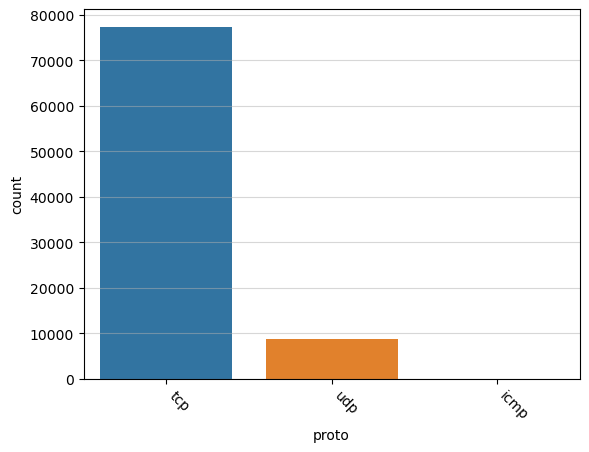

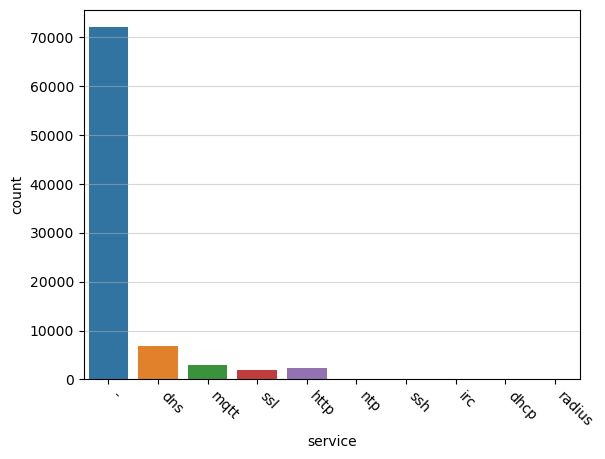

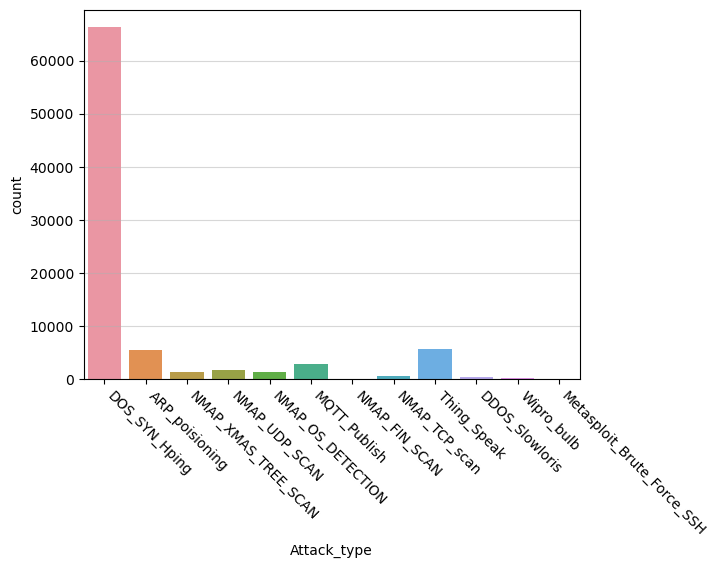

In [66]:
for col in train.columns:
    if train[col].dtype == "object":
        # plt.figure(figsize=(12,6))
        sns.countplot(train, x=col)
        plt.xticks(rotation=-45,ha="left")
        plt.grid(alpha=0.5,axis='y')
        plt.show()

So based on this information and the data dictionary, I don't think I'm going to do much modification to this dataset. Everything may be potentially relevant, especially since I aim to predict each individual network pattern.

In [70]:
# Grab numeric features as a list
numeric_features = [col for col in train.columns if train[col].dtype != "object"]

In [72]:
train[numeric_features].corr()

,id.orig_p,id.resp_p,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,bwd_pkts_per_sec,flow_pkts_per_sec,...,active.avg,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size
id.orig_p,1.000000,0.169030,0.019028,0.059777,0.047047,0.023580,0.045279,-0.096311,-0.096387,-0.096349,...,0.050315,0.016242,0.120086,0.120194,0.018186,0.120754,0.029665,0.206804,0.178459,0.077421
id.resp_p,0.169030,1.000000,0.012383,0.003272,-0.008807,-0.005278,-0.002249,-0.136772,-0.136766,-0.136769,...,0.005679,0.000081,0.022864,0.022340,0.012232,0.022749,0.000218,0.037725,-0.011350,0.132063
flow_duration,0.019028,0.012383,1.000000,0.578753,0.236432,0.491537,0.221056,-0.030624,-0.030618,-0.030621,...,0.056712,0.064867,0.111851,0.161743,0.995360,0.153046,0.137684,0.069657,0.073658,0.004787
fwd_pkts_tot,0.059777,0.003272,0.578753,1.000000,0.684009,0.909483,0.599318,-0.085389,-0.085424,-0.085407,...,0.312721,0.337930,0.144116,0.194578,0.529664,0.174496,0.186116,0.224148,0.241168,0.010732
bwd_pkts_tot,0.047047,-0.008807,0.236432,0.684009,1.000000,0.507643,0.949767,-0.057616,-0.057595,-0.057606,...,0.072017,0.122039,0.098437,0.153093,0.233368,0.128226,0.205560,0.168599,0.203995,0.008189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
idle.avg,0.120754,0.022749,0.153046,0.174496,0.128226,0.072550,0.114235,-0.174636,-0.174599,-0.174618,...,0.208769,0.049758,0.993062,0.995667,0.154426,1.000000,0.238202,0.549781,0.490998,-0.000645
idle.std,0.029665,0.000218,0.137684,0.186116,0.205560,0.101545,0.197075,-0.040470,-0.040461,-0.040466,...,0.025302,0.087473,0.134565,0.319371,0.140041,0.238202,1.000000,0.115200,0.164278,0.005371
fwd_init_window_size,0.206804,0.037725,0.069657,0.224148,0.168599,0.069627,0.122675,-0.275062,-0.275384,-0.275224,...,0.248333,0.069388,0.547648,0.546314,0.067319,0.549781,0.115200,1.000000,0.833929,0.322356
bwd_init_window_size,0.178459,-0.011350,0.073658,0.241168,0.203995,0.090211,0.145543,-0.260038,-0.259989,-0.260014,...,0.219870,0.106557,0.481563,0.493385,0.071669,0.490998,0.164278,0.833929,1.000000,-0.001926


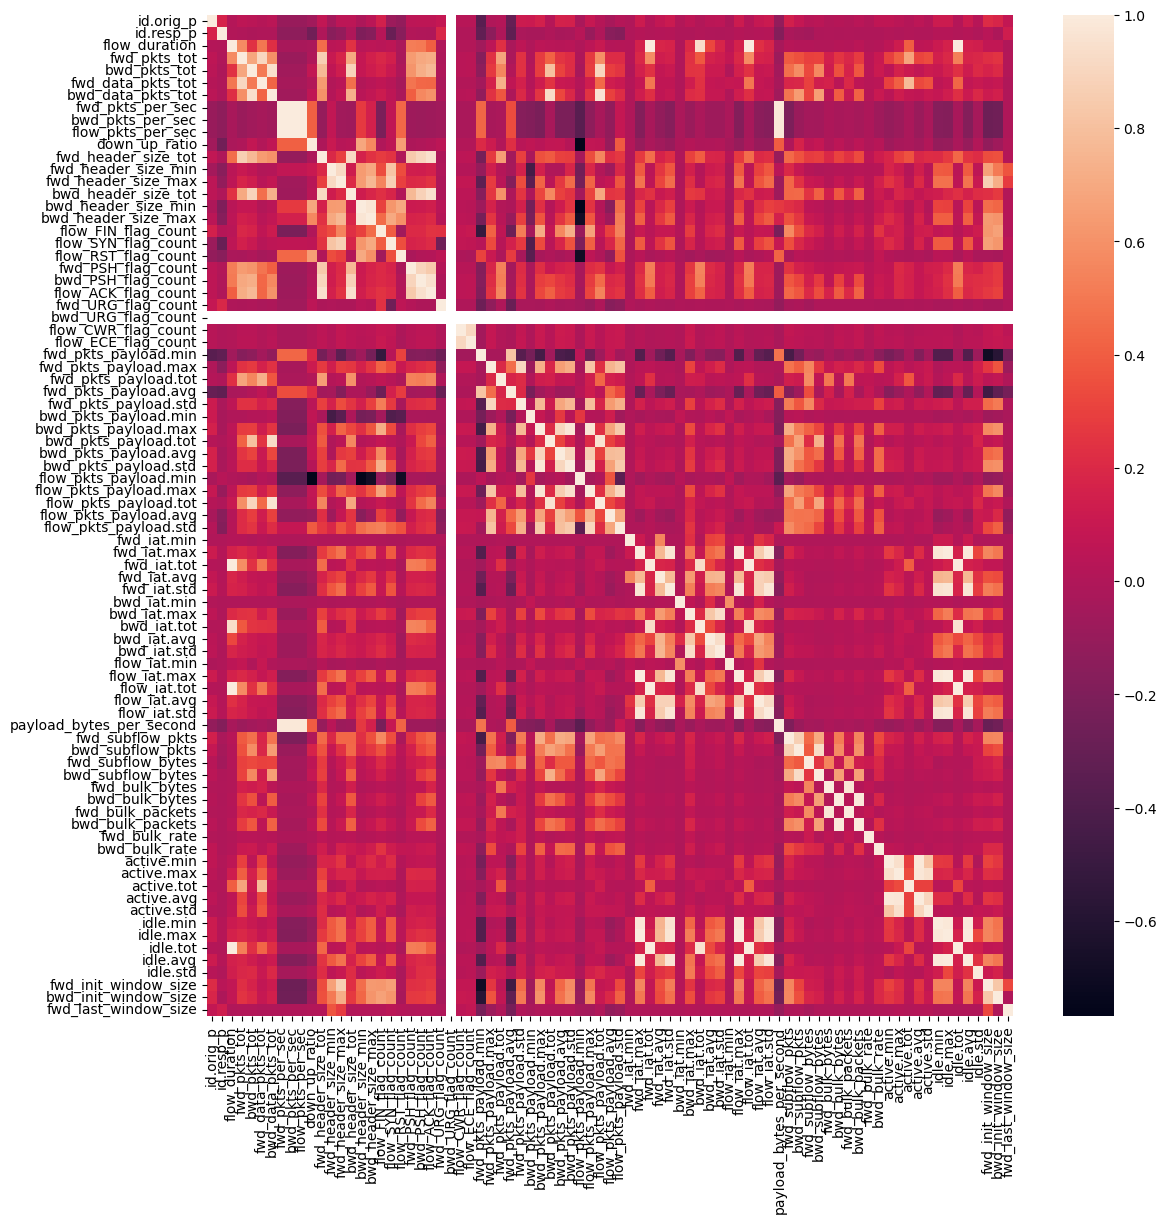

In [74]:

plt.figure(figsize=(13,13))
sns.heatmap(
    train[numeric_features].corr(),
    xticklabels=numeric_features,
    yticklabels=numeric_features
)
plt.show()

In [75]:
# Isolate why there's a blank space
train[numeric_features].corr().loc['bwd_URG_flag_count']

id.orig_p              NaN
id.resp_p              NaN
flow_duration          NaN
fwd_pkts_tot           NaN
bwd_pkts_tot           NaN
                        ..
idle.avg               NaN
idle.std               NaN
fwd_init_window_size   NaN
bwd_init_window_size   NaN
fwd_last_window_size   NaN
Name: bwd_URG_flag_count, Length: 81, dtype: float64

In [76]:
# Looking at the values of this one feature type to understand why it doesn't correlate with anything
train.loc[:,'bwd_URG_flag_count'].sum()

0

While I'm still learning and understanding and developing ways to question the data, I'm going to use leverage ChatGPT to help with ideas and questions to ask.

---

1. ~Network Behavior Analysis~
    - Question: What are the common characteristics of network flow durations for different types of services?
    - Prediction: Predict the duration of a network session based on initial packet characteristics such as the number of packets sent/received in the first few seconds of the connection.
> This question doesn't really work well because I'm trying to target the attack type. Also, I don't think I have time for this.
2. Protocol and Service Analysis
    - Question: How do different protocols affect the size and frequency of packets?
    - Prediction: Classify the type of service based on the protocol, packet sizes, and transmission rates.
> **Idea**: Map protocols/services against frequency of packets. 
3. Security and Anomaly Detection
    - Question: Are there patterns or anomalies in packet transmission that could indicate a security threat or a network attack?
    - Prediction: Detect potential security threats (e.g., DDoS, port scanning) by analyzing patterns such as unusual increases in packet rates, specific flag combinations, or abnormal window sizes.
> **Idea**: Map rate of duration packets of certain types against target variable
4. ~Performance and Optimization~
    - Question: What factors contribute to latency in network responses?
    - Prediction: Forecast the network latency based on factors like total packets, payload sizes, and flags such as SYN and ACK.
> Disregard
5. Congestion Analysis
    - Question: How does the window size adjustment correlate with the flow control and congestion in the network?
    - Prediction: Predict times of congestion based on changes in window sizes, packet rates, and flag counts like CWR and ECE.
> 
6. Traffic Flow Analysis
    - Question: What are typical upload/download ratios for different types of connections, and how might they indicate the nature of the traffic?
    - Prediction: Identify the directionality of a flow (predominantly upload vs. download) based on the down/up ratio and packet sizes.
> 
7. Network Service Quality
    - Question: How does the inter-arrival time of packets affect the quality of streaming services?
    - Prediction: Assess the quality of service for real-time applications by analyzing inter-arrival times and jitter (standard deviation of inter-arrival times).
> 
8. Resource Utilization
    - Question: Which types of network activities lead to higher resource utilization in terms of bandwidth and data volume?
    - Prediction: Predict the bandwidth utilization based on the types of services, packet sizes, and flow durations.
> 
9. Correlation Studies
    - Question: How are different network metrics such as packet sizes, flags, and flow durations correlated with each other?
    - Analysis: Use correlation matrices and PCA to understand the relationships and principal drivers of network behavior.
> 
---

Accordingly, I'm going to ask the following questions:
**Questions**:
1. Across duration and size of packets, where do the attack patterns tend to lie? Types of services? Protocols?
2. Which services are attack patterns usually targeting?
3. Which protocols are attack patterns usually targeting?
4. What is the distribution of attacks to normal traffic? How does this compare with the services and protocols being used? How does this compare with the duration and size of packets?

---
On top of this, before moving on to the next stage, I am going to use the SciKitLearn PCA tool and also drop the bwd_URG_flag_count, since that seems to be irrelevant across the board.

In [83]:
# Create a list of the columns to be dropped
col_drop = ['bwd_URG_flag_count']

# Print if the columns are present before removing them.
print(train.columns.isin(col_drop).sum())

# Drop the columns. Add the errors='ignore' because I'm running this multiple times as I add to it.
train = train.drop(col_drop,axis=1,errors='ignore')

# Get a summary to verify the columns aren't present.
print(train.columns.isin(col_drop).sum())

1
0


Great! We'll be using this later. Now onto PCA, which stands for Principal Component Analysis!

In [86]:
# Import the desired component
from sklearn.decomposition import PCA

Before I forget, I actually do need to adjust the function. Right now, it always pulls from the internet, but I want it to store the information locally for faster retrieval.

### Storage for faster retrieval

In [99]:
# Verify my original dataframe
print(f'Original dataframe shape: {df.shape}')
print(f'Original columns: {df.columns}')

Original dataframe shape: (123117, 84)
Original columns: Index(['id.orig_p', 'id.resp_p', 'proto', 'service', 'flow_duration',
       'fwd_pkts_tot', 'bwd_pkts_tot', 'fwd_data_pkts_tot',
       'bwd_data_pkts_tot', 'fwd_pkts_per_sec', 'bwd_pkts_per_sec',
       'flow_pkts_per_sec', 'down_up_ratio', 'fwd_header_size_tot',
       'fwd_header_size_min', 'fwd_header_size_max', 'bwd_header_size_tot',
       'bwd_header_size_min', 'bwd_header_size_max', 'flow_FIN_flag_count',
       'flow_SYN_flag_count', 'flow_RST_flag_count', 'fwd_PSH_flag_count',
       'bwd_PSH_flag_count', 'flow_ACK_flag_count', 'fwd_URG_flag_count',
       'bwd_URG_flag_count', 'flow_CWR_flag_count', 'flow_ECE_flag_count',
       'fwd_pkts_payload.min', 'fwd_pkts_payload.max', 'fwd_pkts_payload.tot',
       'fwd_pkts_payload.avg', 'fwd_pkts_payload.std', 'bwd_pkts_payload.min',
       'bwd_pkts_payload.max', 'bwd_pkts_payload.tot', 'bwd_pkts_payload.avg',
       'bwd_pkts_payload.std', 'flow_pkts_payload.min',
       '

In [229]:
# add it to a csv
df.to_csv('RT_IoT2022.csv')

In [231]:
# import os libraries to work with directory services
import os,json

In [233]:
# modify previously made function to check if a file exists
def check_file_exists(filename):
    """
    Function takes a filename, query, and url and checks if the file exists. It will load the dataset requested from either SQL or from the local file.
    """
    if os.path.exists(filename):
        print('Reading from file...')
        df = pd.read_csv(filename,index_col=0)
        
        return df
    else:
        return 0 

In [235]:
check_file_exists(filename='RT_IoT2022.csv')

Reading from file...


,id.orig_p,id.resp_p,proto,service,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,...,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,Attack_type
0,38667,1883,tcp,mqtt,32.011598,9,5,3,3,0.281148,...,0.0,29729182.96,29729182.96,29729182.96,29729182.96,0.0,64240,26847,502,MQTT_Publish
1,51143,1883,tcp,mqtt,31.883584,9,5,3,3,0.282277,...,0.0,29855277.06,29855277.06,29855277.06,29855277.06,0.0,64240,26847,502,MQTT_Publish
2,44761,1883,tcp,mqtt,32.124053,9,5,3,3,0.280164,...,0.0,29842149.02,29842149.02,29842149.02,29842149.02,0.0,64240,26847,502,MQTT_Publish
3,60893,1883,tcp,mqtt,31.961063,9,5,3,3,0.281593,...,0.0,29913774.97,29913774.97,29913774.97,29913774.97,0.0,64240,26847,502,MQTT_Publish
4,51087,1883,tcp,mqtt,31.902362,9,5,3,3,0.282111,...,0.0,29814704.90,29814704.90,29814704.90,29814704.90,0.0,64240,26847,502,MQTT_Publish
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123112,59247,63331,tcp,-,0.000006,1,1,0,0,167772.160000,...,0.0,0.00,0.00,0.00,0.00,0.0,1024,0,1024,NMAP_XMAS_TREE_SCAN
123113,59247,64623,tcp,-,0.000007,1,1,0,0,144631.172400,...,0.0,0.00,0.00,0.00,0.00,0.0,1024,0,1024,NMAP_XMAS_TREE_SCAN
123114,59247,64680,tcp,-,0.000006,1,1,0,0,167772.160000,...,0.0,0.00,0.00,0.00,0.00,0.0,1024,0,1024,NMAP_XMAS_TREE_SCAN
123115,59247,65000,tcp,-,0.000006,1,1,0,0,167772.160000,...,0.0,0.00,0.00,0.00,0.00,0.0,1024,0,1024,NMAP_XMAS_TREE_SCAN


In [237]:
os.remove('RT_IoT2022.csv')

In [239]:
check_file_exists(filename='RT_IoT2022.csv')

0

In [241]:
df,rt_data = acquire_iot2022()

In [263]:
# Modify the previously made function and test it again
def acquire_iot2022():
    """
    Function to download and import the RT-IoT2022 dataset. Takes no parameters. Assumes the ucimlrepo has already been installed.
    
    Parameters:
    -----------
    - None
    
    Return:
    -------
    - Pandas DataFrame containing the RT IoT2022 information dataset
    - Dictionary object containing all RT IoT2022 data, including metadata.
    """
    # Define the filename
    fname = 'RT_IoT2022.csv'
    
    df = check_file_exists(filename=fname)
    
    # download the data if 0 was returned
    if type(df)==type(0):
        try:
            from ucimlrepo import fetch_ucirepo 

            # Fetch dataset 
            rt_iot2022 = fetch_ucirepo(id=942)

            # Concatenate the two datasets
            df = pd.concat([rt_iot2022.data.features,rt_iot2022.data.targets],axis=1)
            
            # Create a csv copy
            df.to_csv(fname)

        except:
            print("Import failed due to 1 or more of the following reasons:\n\t - User is missing the UC Irvine Python package.\n\t - Dataset is no longer available at the queried location.\n\t - Some of the libraries in use have changed.")
            
    # Return the dataframe
    return df.copy()

In [265]:
type(df)

pandas.core.frame.DataFrame

In [267]:
type(0) == type(0)

True

In [271]:
df = acquire_iot2022()

Reading from file...


In [277]:
df.sample(5)

,id.orig_p,id.resp_p,proto,service,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,...,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,Attack_type
107152,1719,21,tcp,-,0.000001,1,1,1,0,1.048576e+06,...,0.0,0.0,0.0,0.0,0.0,0.0,64,0,64,DOS_SYN_Hping
33288,15339,21,tcp,-,0.000004,1,1,1,0,2.467238e+05,...,0.0,0.0,0.0,0.0,0.0,0.0,64,0,64,DOS_SYN_Hping
33283,15334,21,tcp,-,0.000005,1,1,1,0,1.997288e+05,...,0.0,0.0,0.0,0.0,0.0,0.0,64,0,64,DOS_SYN_Hping
70993,53119,21,tcp,-,0.000004,1,1,1,0,2.621440e+05,...,0.0,0.0,0.0,0.0,0.0,0.0,64,0,64,DOS_SYN_Hping
50160,32281,21,tcp,-,0.000000,1,0,1,0,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,64,0,64,DOS_SYN_Hping


In [279]:
df.shape

(123117, 84)

### PCA
Now that I've made that adjustment, it's time to return to PCA!

In [286]:
# Import the PCA function
from sklearn.decomposition import PCA

In [294]:
# Create the object
pca = PCA(random_state=ranstate)
pca

PCA(random_state=42)

In [353]:
train,validate,test = data_split(df,ranstate=ranstate)
print(train.shape)
print(validate.shape)
print(test.shape)

(86181, 84)
(25855, 84)
(11081, 84)


In [355]:
# # Attempt to fit the data
# pca.fit(train)

So this results in an error. In that case, I'll save PCA for later.

In [358]:
# Revisit the service column
train.service.value_counts()

service
-         71996
dns        6813
mqtt       2893
http       2432
ssl        1877
ntp          84
dhcp         35
irc          31
ssh          18
radius        2
Name: count, dtype: int64

So I'm assuming the '-' is just standard traffic, so I'm going to fill that with "None"

In [361]:
# remap using lambda and apply
train.service = train.service.apply(lambda x: 'none' if x == '-' else x)

In [365]:
train.service.value_counts()

service
none      71996
dns        6813
mqtt       2893
http       2432
ssl        1877
ntp          84
dhcp         35
irc          31
ssh          18
radius        2
Name: count, dtype: int64

I also want to verify that the 'bwd_URG_flag_count' column is empty on each data set

In [376]:
train.loc[:,'bwd_URG_flag_count'].sum()

0

In [380]:
validate.loc[:,'bwd_URG_flag_count'].sum()

0

In [391]:
test.loc[:,'bwd_URG_flag_count'].sum()

0

In [395]:
# Isolate determining if there is a single value in a column
len(train.bwd_URG_flag_count.value_counts())

1

In [405]:
# Run extra test to find any other columns where there is a single value

# Initiate a collector list
single_val_cols = []

for col in train.columns:
    # print(col)
    
    if len(train[col].value_counts()) == 1:
        # print(col)
        single_val_cols.append(col)

single_val_cols

['bwd_URG_flag_count']

In [409]:
# Initiate a collector list
single_val_cols = []

for col in validate.columns:
    # print(col)
    
    if len(validate[col].value_counts()) == 1:
        # print(col)
        single_val_cols.append(col)

single_val_cols

['bwd_URG_flag_count']

In [411]:
# Initiate a collector list
single_val_cols = []

for col in test.columns:
    # print(col)
    
    if len(test[col].value_counts()) == 1:
        # print(col)
        single_val_cols.append(col)

single_val_cols

['bwd_URG_flag_count']

It is, so I'm definitely removing it here!

I also want to add another column that denotes whether the attack type is normal traffic or an actual attack. I need to rely on the information from the original page for that, which says:

The Dataset contains both Attack patterns and Normal Patterns. 

Attacks patterns Details: 
1. DOS_SYN_Hping------------------------94659
2. ARP_poisoning--------------------------7750
3. NMAP_UDP_SCAN--------------------2590
4. NMAP_XMAS_TREE_SCAN--------2010
5. NMAP_OS_DETECTION-------------2000
6. NMAP_TCP_scan-----------------------1002
7. DDOS_Slowloris------------------------534
8. Metasploit_Brute_Force_SSH---------37
9. NMAP_FIN_SCAN---------------------28

Normal Patterns Details:

1. MQTT -----------------------------------8108
2. Thing_speak-----------------------------4146
3. Wipro_bulb_Dataset-------------------253 
4. Amazon-Alexa -----------------------86842



In [501]:
normal_pattern = ['MQTT_Publish','Thing_Speak','Wipro_bulb','Amazon-Alexa']

In [521]:
train.Attack_type.isin(normal_pattern).sum()

8754

In [517]:
train['traffic_type'] = np.where(train.Attack_type.isin(normal_pattern),'Normal','Attack')

In [519]:
train.traffic_type.value_counts()

traffic_type
Attack    77427
Normal     8754
Name: count, dtype: int64

In [523]:
def clean_data(df):
    """
    Take the RT_IoT2022 dataframe and clean and prepare it for usage.
    
    Parameters:
    -----------
    - df: DataFrame
        The DataFrame (train, validate, test, or full) to be cleaned
    
    Return:
    -------
    - copy_df: DataFrame
        The DataFrame cleaned and prepared for usage
    
    """
    
    # Create a copy to work with
    copy_df = df.copy()
    
    # remap using lambda and apply
    copy_df.service = copy_df.service.apply(lambda x: 'none' if x == '-' else x)
    
    # Fix the spelling error on ARP poisoning
    copy_df.Attack_type.apply(lambda x:'ARP_poisoning' if x=='ARP_poisioning' else x)
    
    # Initiate a collector list
    single_val_cols = []

    # Find any columns that have only a single value in them
    for col in copy_df.columns:
        # print(col)

        if len(copy_df[col].value_counts()) == 1:
            # print(col)
            single_val_cols.append(col)
    
    # Drop any single value columns
    copy_df = copy_df.drop(single_val_cols,axis=1,errors='ignore')
    
    # Add a column denoting attack or normal pattern
    normal_pattern = ['MQTT_Publish','Thing_Speak','Wipro_bulb','Amazon-Alexa']
    copy_df['traffic_type'] = np.where(copy_df.Attack_type.isin(normal_pattern),'Normal','Attack')
    
    return copy_df

In [421]:
clean_data(df).shape

(123117, 83)

In [423]:
clean_data(train).shape

(86181, 83)

### Do it all!
Now I need to build a function that acquires and prepares the data for my usage!

In [436]:
df = acquire_iot2022()

Reading from file...


In [442]:
df.shape

(123117, 84)

In [444]:
df = clean_data(df)
df.shape

(123117, 83)

In [446]:
train,validate,test = data_split(df,ranstate=ranstate)
print(train.shape)
print(validate.shape)
print(test.shape)

(86181, 83)
(25855, 83)
(11081, 83)


In [448]:
def wrangle_iot2022():
    """
    Summary function that acquires, cleans, and returns the RT_IoT2022 data
    """
    ranstate = 42
    
    # Acquire
    df = acquire_iot2022()
    
    # Clean
    df = clean_data(df)
    
    # Split
    train,validate,test = data_split(df,ranstate=ranstate)
    
    return [train,validate,test]

In [450]:
df_set = wrangle_iot2022()
len(df_set)

Reading from file...


3

In [452]:
df_set[0]

,id.orig_p,id.resp_p,proto,service,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,...,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,Attack_type
25767,7818,21,tcp,none,0.000004,1,1,1,0,2.467238e+05,...,0.0,0.0,0.0,0.0,0.0,0.0,64,0,64,DOS_SYN_Hping
46188,28240,21,tcp,none,0.000004,1,1,1,0,2.621440e+05,...,0.0,0.0,0.0,0.0,0.0,0.0,64,0,64,DOS_SYN_Hping
43289,25341,21,tcp,none,0.000000,1,0,1,0,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,64,0,64,DOS_SYN_Hping
38474,20526,21,tcp,none,0.000004,1,1,1,0,2.467238e+05,...,0.0,0.0,0.0,0.0,0.0,0.0,64,0,64,DOS_SYN_Hping
18646,33928,137,udp,dns,0.000000,1,0,1,0,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,ARP_poisioning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21220,3269,21,tcp,none,0.000005,1,1,1,0,1.997288e+05,...,0.0,0.0,0.0,0.0,0.0,0.0,64,0,64,DOS_SYN_Hping
112074,9479,21,tcp,none,0.000002,1,1,1,0,4.660338e+05,...,0.0,0.0,0.0,0.0,0.0,0.0,64,0,64,DOS_SYN_Hping
27467,9518,21,tcp,none,0.000006,1,1,1,0,1.677722e+05,...,0.0,0.0,0.0,0.0,0.0,0.0,64,0,64,DOS_SYN_Hping
77094,9106,21,tcp,none,0.000003,1,1,1,0,3.226388e+05,...,0.0,0.0,0.0,0.0,0.0,0.0,64,0,64,DOS_SYN_Hping
